In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
import random

import seaborn as sns


# ЭКЗАМЕН

#**1.1 Реализовать функцию построения 2,2 цветка.**

In [ ]:
def flower(n):
    G = nx.Graph()

    G.add_edge(0, 1)
    n_nodes = 2

    for i in range(n):
        edges_to_add = [] # массив для новых ребер

        for edge in G.edges:
            # создаем новое первое ребро
            edges_to_add.append((edge[0], n_nodes))
            edges_to_add.append((edge[1], n_nodes))
            n_nodes += 1
            # создаем новое второе ребро
            edges_to_add.append((edge[0], n_nodes))
            edges_to_add.append((edge[1], n_nodes))
            n_nodes += 1

        G = nx.Graph() # не удаляем старые ребра, а просто создаем новый граф с полученными ребрами
        G.add_edges_from(edges_to_add)

    return G

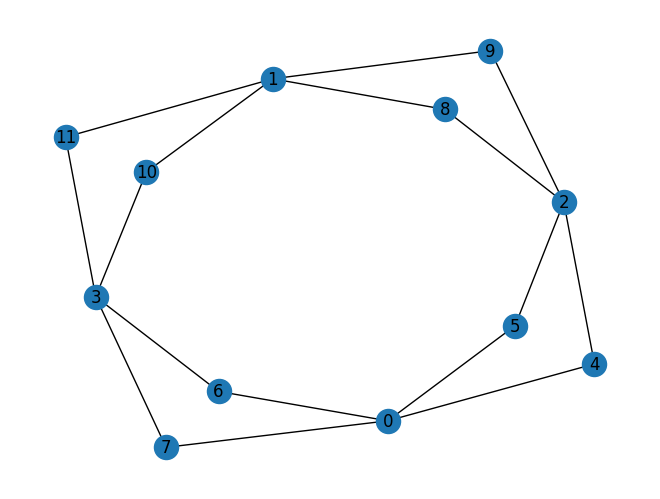

In [ ]:
nx.draw(flower(2),with_labels = True)

# 1.2 Разбить сеть карате клуба на сообщества не менее чем 3 способами с помощью дискретного алгоритма распространения меток. Визуализировать результат.

In [ ]:
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import random
from collections import Counter

In [ ]:
def label_init(G):
    '''Данная функция каждому узлу присваивает метку — номер узла'''
    for i, n in enumerate(G.nodes):
        G.nodes[n]['label'] = i

In [ ]:
def update_label(node, label, G, log=False):
    freqs = Counter(G.nodes[item]['label'] for item in G.neighbors(node))
    max_freq = max(freqs.values())
    if log:
        print(f'распостраненность меток у соседей {node} (label = {label}): {freqs}')
    freqs_max = {n: f for n, f in freqs.items() if f == max_freq}

    if label not in freqs_max.keys():
        G.nodes[node]['label'] = random.choice(list(freqs_max.keys()))
        return True # label изменился
    else:
        return False # label не изменился
        changes.append(False)

In [ ]:
def Label_Propagation_Algorithm(G, log=False):
    # инициализируем веса
    for node, data in Karate.nodes(data = True):
        label_init(G)

    changed = True
    while changed:
        if log:
            print(f'очередной шаг ------------------------')
        changed = False
        for node, label in G.nodes(data='label'):
            ch = update_label(node, label, G, log=log)
            changed = changed or ch

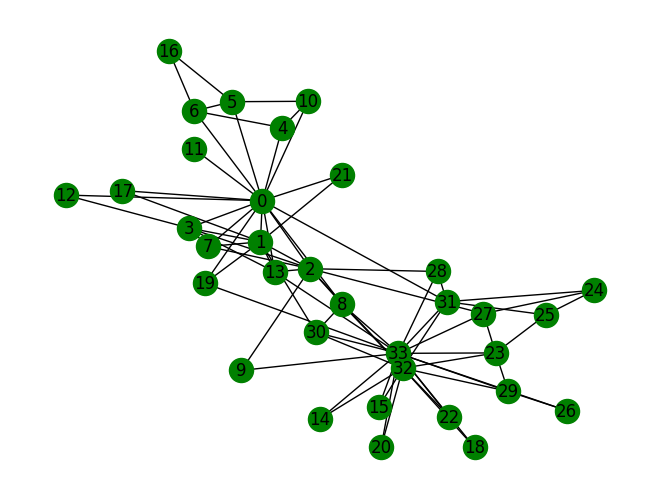

In [ ]:
Karate = nx.karate_club_graph()
Karate_pos = nx.spring_layout(Karate, seed = 40)
nx.draw(Karate, pos = Karate_pos, with_labels = True, node_color = 'green')

In [ ]:
# Создание цветов
color = {i: "#"+''.join([random.choice('0123456789ABCDEFFFFFFF') for j in range(6)]) for i in range(len(Karate.nodes()))}

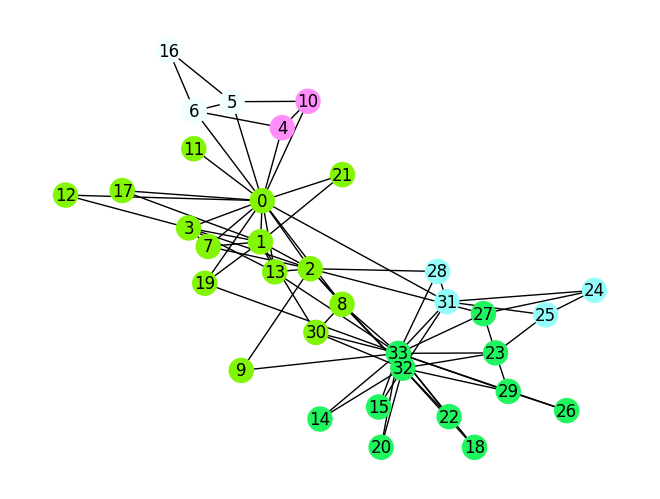

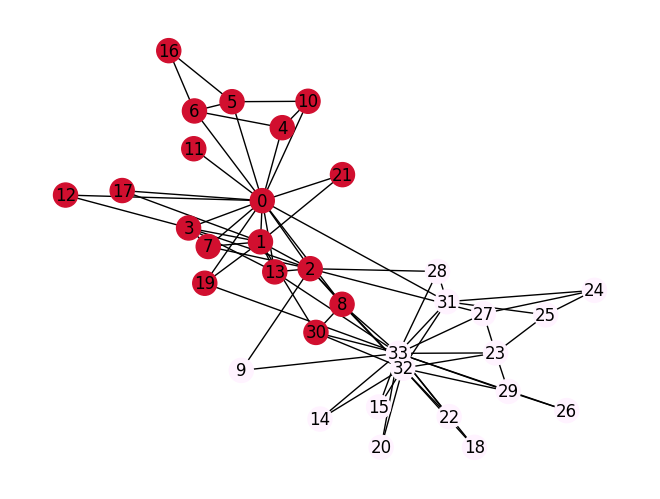

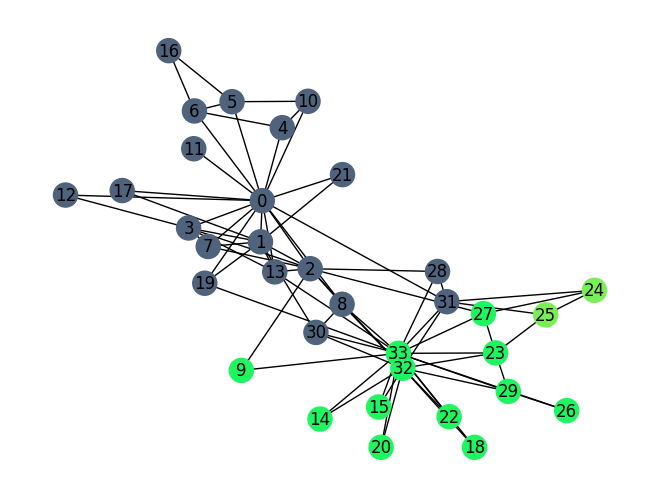

In [ ]:
for propagation_seed in [0, 15, 42]:
    random.seed(propagation_seed)
    Label_Propagation_Algorithm(Karate, log=False)
# создаем список node_color, в котором цвета соответсвуют метки узла
    node_color = [color[l] for n, l in Karate.nodes(data='label')]
    plt.figure()
    nx.draw(Karate, pos = Karate_pos, with_labels=True, node_color = node_color)

#**1.3 Воспользовавшись реализацией алгоритма PageRank из netwotkx, вычислите важность каждого узла в сети. Визуализируйте сеть, продемонстрировав важности узла размером. Удалите 2 самых важных узла и выполните задание для полученного графа (его крупнейшей компаненты).**

###  PageRank - это алгоритм, разработанный Google для оценки важности веб-страниц в поисковой выдаче.

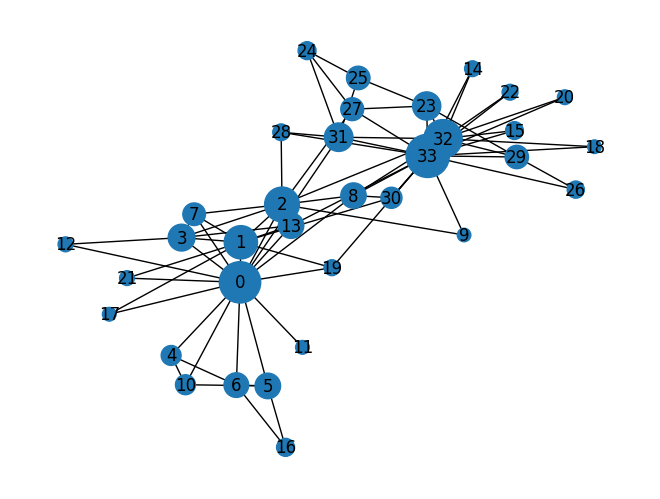

In [ ]:
import networkx as nx

G = nx.karate_club_graph()

pr = nx.pagerank(G)

pos = nx.spring_layout(G)
node_size = [10000 * pr[node] for node in G.nodes()]
nx.draw(G, pos=pos, node_size = node_size, with_labels = True)

In [ ]:
a = sorted(pr, key = lambda x:pr[x])[-2:]
a

[0, 33]

#### Видим, что 2 самых важных узла — узлы 0 и 33

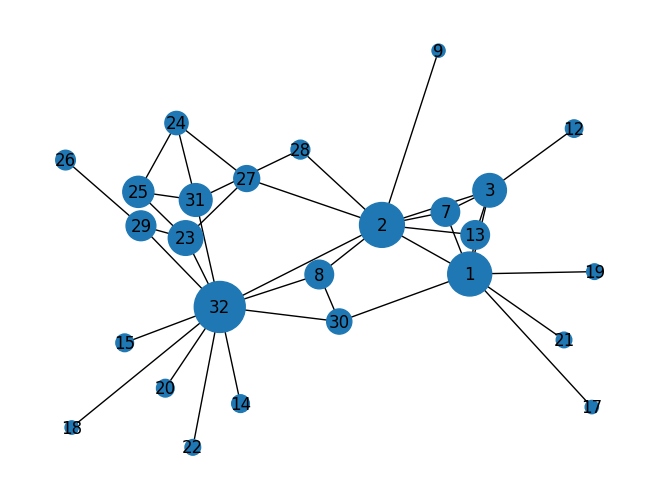

In [ ]:
G.remove_nodes_from([0, 33])
# Здесь определяется наибольшая связная компонента (connected component) в графе G.
# Это подграф, в котором все узлы связаны между собой. Функция nx.connected_components(G) возвращает набор компонент, и max(..., key=len) выбирает компоненту с наибольшим числом узлов.
largest_cc = max(nx.connected_components(G), key = len) # largest_cc - список узлов
G = G.subgraph(largest_cc) #Создается подграф G, который содержит только УЗЛЫ и ребра из наибольшей связной компоненты.

pr = nx.pagerank(G)

pos = nx.spring_layout(G)
node_size = [10000 * pr[node] for node in G.nodes()]
nx.draw(G, pos=pos, node_size=node_size, with_labels=True)